### Intro

Dataset link
https://archive.ics.uci.edu/dataset/222/bank+marketing

dataset is used from above link in this project is bank-additional-full.csv , which i renamed as bank_row.csv

### Attribute information:

   Input variables:
   ##### bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   ##### related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   ##### other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   ##### social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target for modeling):
  
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")


### What is a Term Deposit?
A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time. For more information with regards to Term Deposits please click on this link from Investopedia: https://www.investopedia.com/terms/t/termdeposit.asp

### 1.  Import Data and Required Packages
#####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


##### Import the CSV Data as Pandas DataFrame

In [33]:
df = pd.read_csv('../data/bank_row.csv' , sep=';')

##### Analyzing and Handling duration first

In [34]:
group = df.groupby('y')['duration'].mean()
group

y
no     220.844807
yes    553.191164
Name: duration, dtype: float64

average call duration of yes is 553 which far greter then average call duration of 220. which show high correlation between duration and subscription result

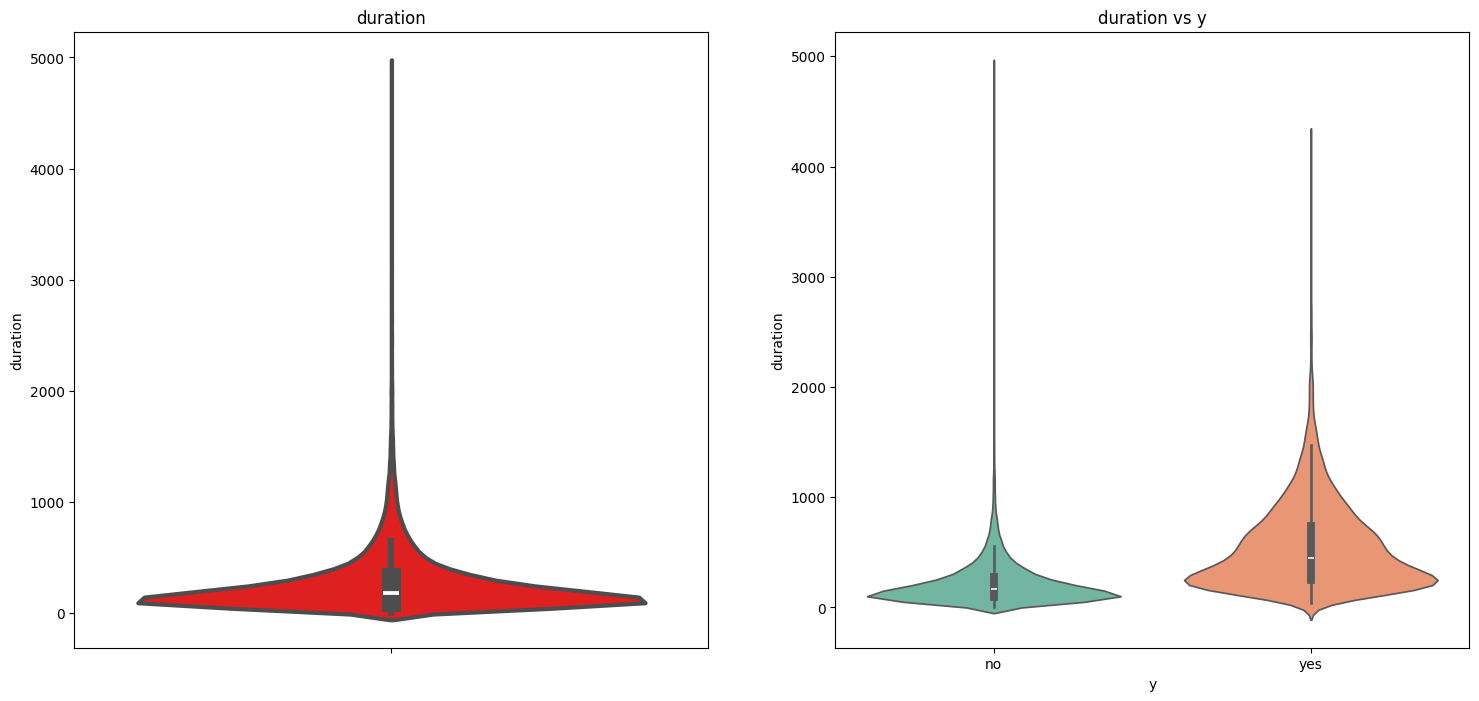

In [35]:

plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
plt.title('duration')
sns.violinplot(y='duration',data=df,color='red',linewidth=3)
plt.subplot(1, 2, 2)
plt.title('duration vs y')
sns.violinplot(x='y', y='duration', data=df, palette='Set2')  
plt.show()

We can clearly see from above results duration highly affect results , but before call we not have duration and after call in most of cases we know results

so duration not useful in modeling  it should only for benchmark purposes

In [36]:
df.drop(columns=['duration'], inplace=True)

### 2. Basic Overview

##### Show Top 5 Records

In [37]:
df.head()  

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##### Checking Shape of Data 

In [38]:
df.shape

(41188, 20)

##### Check data type

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [40]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


##### Checking the number of unique values of each column

In [41]:
for col in df.columns:
    print(f"in {col} there are {df[col].nunique()} unique values which are as follow : {df[col].unique()}")
    print()

in age there are 78 unique values which are as follow : [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

in job there are 12 unique values which are as follow : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

in marital there are 4 unique values which are as follow : ['married' 'single' 'divorced' 'unknown']

in education there are 8 unique values which are as follow : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

in default there are 3 unique values which are as follow : ['no' 'unknown' 'yes']

in housing there are 3 unique values which are as follow : ['no' 'yes' 'unknown']

in loan there are 3 unique values which are as follo

##### - There is no impossible values in any columns but pdays have value 999 which refer custemer never contected before


In [44]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##### Define numeric and categorical columns

In [45]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

We have 11 categorical features : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


### 3 . Data Checks

### check for missing values

In [46]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


##### There are no missing values in dataset.

### Check Duplicates

In [47]:
df.duplicated().sum()

1784

In [48]:
# Show duplicated rows with their count grouped by target
df[df.duplicated()].groupby('y').size()


y
no     1742
yes      42
dtype: int64

In [49]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
11,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
16,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
31,59,technician,married,unknown,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
104,52,admin.,divorced,university.degree,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39985,27,admin.,single,high.school,no,no,no,cellular,jun,tue,2,999,0,nonexistent,-1.7,94.055,-39.8,0.761,4991.6,yes
40401,31,student,single,unknown,no,yes,no,cellular,aug,thu,2,999,0,nonexistent,-1.7,94.027,-38.3,0.904,4991.6,yes
40404,41,entrepreneur,married,university.degree,no,yes,no,cellular,aug,thu,1,999,0,nonexistent,-1.7,94.027,-38.3,0.904,4991.6,yes
40806,35,technician,married,professional.course,no,yes,no,cellular,sep,thu,1,999,2,failure,-1.1,94.199,-37.5,0.878,4963.6,no


##### Here are duplicates so we going to remove it

In [50]:
df.drop_duplicates(inplace=True)

In [51]:
df.duplicated().sum()

0

In [52]:
df.shape

(39404, 20)

### 4. Univariate and Bivariate Analysis Start

#### 4.1 For Numerical Features

In [53]:
# identify numeric features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))

We have 9 numerical features : ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [54]:
# Full descriptive stats
num_summary = df[numeric_features].describe().T    # Transpose the DataFrame for better readability
num_summary['range'] = num_summary['max'] - num_summary['min']
num_summary['skewness'] = df[numeric_features].skew()
num_summary['kurtosis'] = df[numeric_features].kurt()
num_summary


,count,mean,std,min,25%,50%,75%,max,range,skewness,kurtosis
age,39404.0,40.116105,10.460328,17.000,32.000,38.000,47.000,98.000,81.000,0.773123,0.762839
campaign,39404.0,2.618744,2.814780,1.000,1.000,2.000,3.000,56.000,55.000,4.692620,35.840678
pdays,39404.0,960.847097,190.869184,0.000,999.000,999.000,999.000,999.000,999.000,-4.803050,21.070768
previous,39404.0,0.178738,0.503172,0.000,0.000,0.000,0.000,7.000,7.000,3.767460,19.408218
emp.var.rate,39404.0,0.064067,1.577041,-3.400,-1.800,1.100,1.400,1.400,4.800,-0.705381,-1.090468
cons.price.idx,39404.0,93.577538,0.583820,92.201,93.075,93.798,93.994,94.767,2.566,-0.233400,-0.847828
cons.conf.idx,39404.0,-40.499604,4.644327,-50.800,-42.700,-41.800,-36.400,-26.900,23.900,0.307780,-0.352433
euribor3m,39404.0,3.601243,1.742337,0.634,1.334,4.857,4.961,5.045,4.411,-0.686284,-1.440004
nr.employed,39404.0,5165.986481,72.763866,4963.600,5099.100,5191.000,5228.100,5228.100,264.500,-1.025394,-0.051686


#### 1. Age
Mean ≈ 40.1 years, with a standard deviation ≈ 10.5: most customers are in their late 20s to early 50s.

skewness ≈ +0.77: a modest right‐tail, so there are some older outliers (up to age 98) pulling the mean up.

Kurtosis ≈ +0.76: a bit “peaked” relative to a normal distribution—ages are relatively concentrated around the center with moderate tail weight.

Insight: Our clientele is mostly middle‐aged, with a few very senior customers. Age doesn’t vary widely, so it may not be the strongest differentiator unless those older outliers behave very differently.

#### 2. Campaign (number of contacts during this campaign)
Mean ≈ 2.62, median = 2, but a max of 56 and std ≈ 2.81.

Skewness ≈ +4.69, kurtosis ≈ +35.84: extremely right‐skewed and heavy‐tailed—most people receive only 1–3 contacts, but a tiny fraction get contacted dozens of times.

25% at 1, 75% at 3: 75% of customers had less then 3 touches.

Insight: The vast majority need very few touches; the customers with 10+ touches may represent hard‐to‐reach or particularly unresponsive segments (or data errors). 

#### 3. Pdays (days since last contact of previous campaign)
Mean ≈ 960.8, but recall 999 is a sentinel meaning “never contacted before.”

75%, 50%, 25% all at 999 and min = 0.

Skewness ≈ –4.80, kurtosis ≈ +21.07: a left‐heavy distribution because almost everyone is at that 999 value, with a small group having genuine days.

Insight: Nearly all (about 76–78%) were never contacted previously. 

#### 4. Previous (number of contacts before this campaign)
Mean ≈ 0.18, median = 0, std ≈ 0.50, max = 7.

Skewness ≈ +3.77, kurtosis ≈ +19.41: again, very skewed—most customers have zero past contacts; a tiny fraction saw multiple previous touches.

25% at 0, 75% at 0: 75% of have zero past contacts.

Insight: Prior campaigns rarely reached this audience. Zero‐inflation suggests using a binary flag (“had any previous contacts”) or a zero‐inflated model if you keep the count.


#### 5. Emp.var.rate (Employment variation rate)
Mean ≈ +0.06, std ≈ 1.58, range [–3.4, +1.4].

Median = +1.1, 25% = –1.8, 75% = +1.4, skewness ≈ –0.71 (slightly left‐tailed), kurtosis ≈ –1.09 (flatter than normal).

Insight: negative mean and median above zero suggest more observations in moderate positive territory, but also some notable downturns (–3.4).

#### 6.Cons.price.idx (Consumer price index)
Mean ≈ 93.58, std ≈ 0.58, range ≈ [92.20, 94.77].

Very tight IQR (25% = 93.075; 75% = 93.994), skewness ≈ –0.23, kurtosis ≈ –0.85.

Insight: Price levels were quite stable , over the period observed—little variation. 

#### 7. Cons.conf.idx (Consumer confidence index)
Mean ≈ –40.50, std ≈ 4.64, range [–50.8, –26.9].

Median = –41.8, IQR from –42.7 to –36.4, slight skewness ≈ +0.31, kurtosis ≈ –0.35.

Insight: Confidence levels have a moderate spread but remain negative overall. 

#### 8. Euribor3m (3-month Euribor rate)
Mean ≈ 3.60, std ≈ 1.74, range [0.63, 5.045].

Median = 4.857, IQR from 1.334 to 4.961, skewness ≈ –0.69, kurtosis ≈ –1.44 (flatter-topped).

Insight: Interest rates varied much; most observations are on the higher side (>4%).

#### 9. Nr.employed (Number of employees rate)
Mean ≈ 5,166, std ≈ 72.76, range [4,963.6, 5,228.1].

Tight IQR (5099.1 to 5228.1), skewness ≈ –1.03, kurtosis ≈ –0.05.

Insight:Nr.employed have a moderate spread


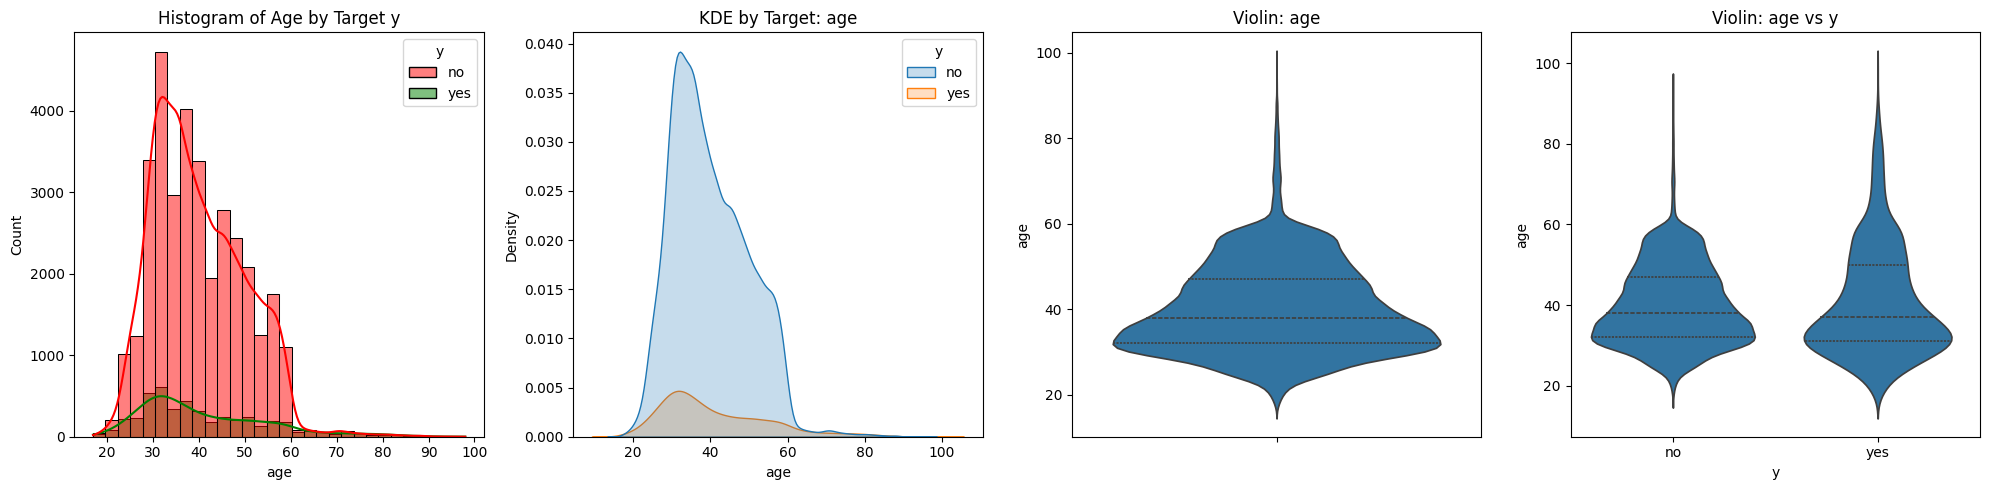

In [55]:
fig, axes = plt.subplots(1, 4, figsize=(20,5))  # 1 row, 4 columns
# sns.histplot(df['age'], kde=True, bins=30, color='skyblue', ax=axes[0])
# axes[0].set_title(f'Histogram: age')

# split by yes/no
sns.histplot(
    data=df,
    x='age',
    hue='y',            
    bins=30,
    kde=True,
    palette={'yes':'green', 'no':'red'}, 
    alpha=0.5,          
    ax=axes[0]
)
axes[0].set_title(f'Histogram of Age by Target y')

sns.kdeplot(data=df, x='age', hue='y', fill=True, ax=axes[1])
axes[1].set_title(f'KDE by Target: age')

sns.violinplot(y='age',data=df,inner="quart", ax=axes[2])
axes[2].set_title(f'Violin: age')

sns.violinplot(x='y', y='age', data=df, inner="quart", ax=axes[3])
axes[3].set_title(f"Violin: age vs y")

plt.tight_layout()
plt.show()

Most Customers Are Around 30–60 Years Old

Conversion Rate Seems Slightly Higher for customer whose age is less than 28 year.but they are less present(dencity of people are less).

Older Customers (60+)  more Subscribe but theire dencity also less. 

big amount of customer from 28 to 60 but theire conversion rate is least

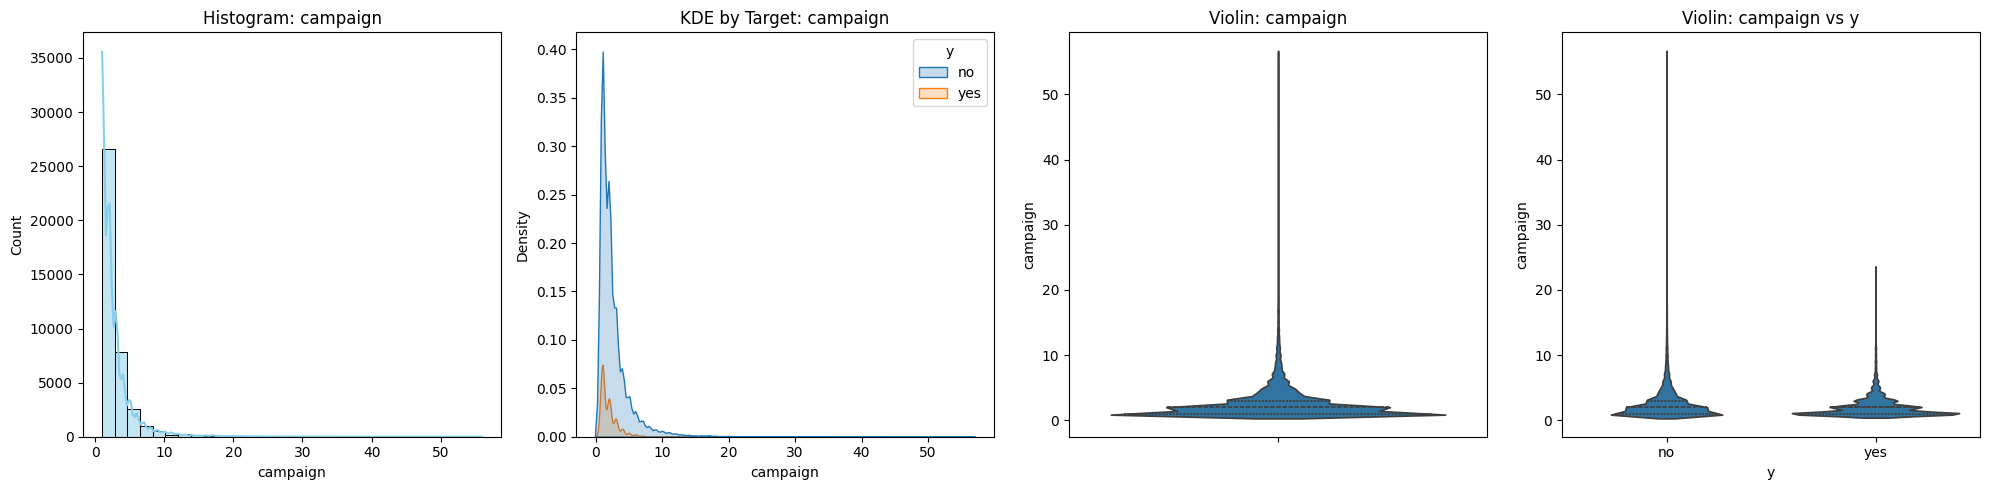

In [56]:
fig, axes = plt.subplots(1, 4, figsize=(20,5))  

sns.histplot(df['campaign'], kde=True, bins=30, color='skyblue', ax=axes[0])
axes[0].set_title(f'Histogram: campaign')

sns.kdeplot(data=df, x='campaign', hue='y', fill=True, ax=axes[1])
axes[1].set_title(f'KDE by Target: campaign')

sns.violinplot(y='campaign',data=df,inner="quart", ax=axes[2])
axes[2].set_title(f'Violin: campaign')

sns.violinplot(x='y', y='campaign', data=df, inner="quart", ax=axes[3])
axes[3].set_title(f"Violin: campaign vs y")

plt.tight_layout()
plt.show()

Most Customers Were Contacted ≤ 4 Times. sharp drop-off after that.

“yes” responses are rare when campaign > 4.

Very few customers are contacted that many times  (10+), and they rarely convert (almost all are “no”).

Aggressive Campaigning May Hurt Conversion
– Repeated contact ( high campaign values) is associated with reduced conversion rates.

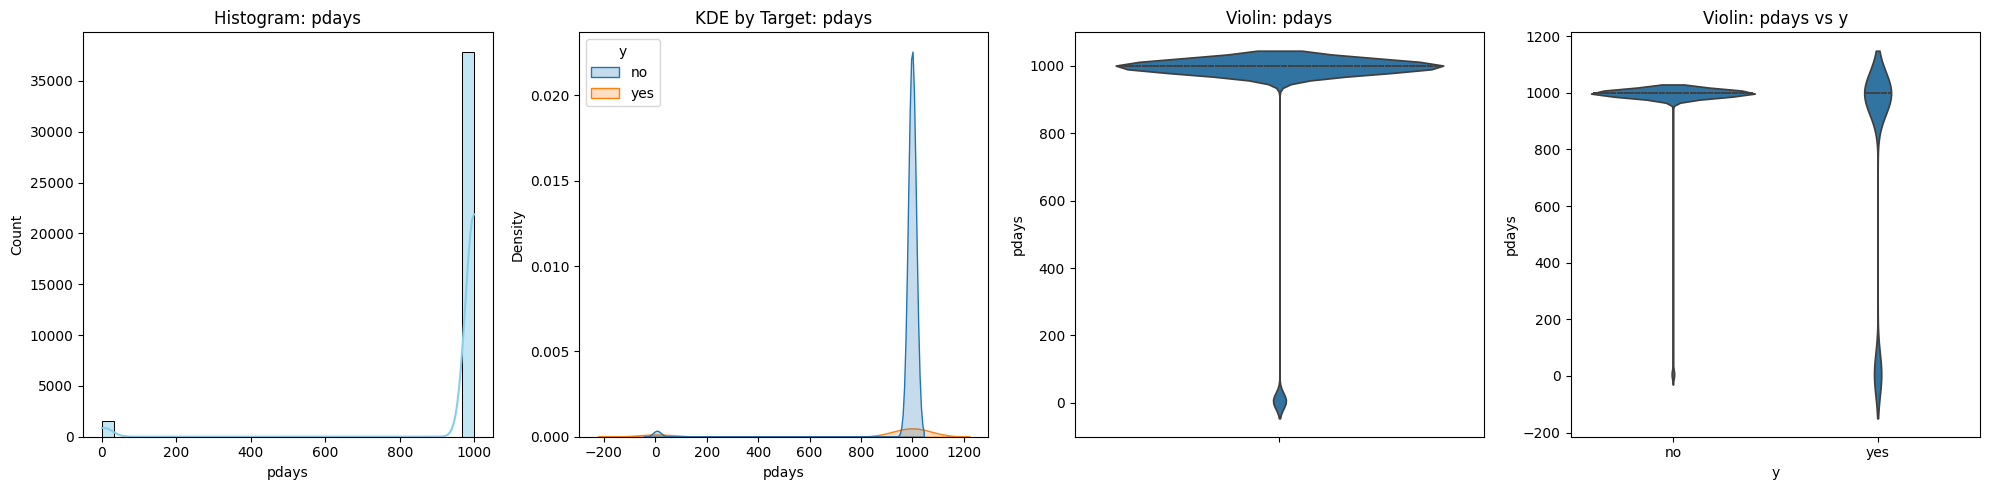

In [57]:
fig, axes = plt.subplots(1, 4, figsize=(20,5))  

sns.histplot(df['pdays'], kde=True, bins=30, color='skyblue', ax=axes[0])
axes[0].set_title(f'Histogram: pdays')

sns.kdeplot(data=df, x='pdays', hue='y', fill=True, ax=axes[1])
axes[1].set_title(f'KDE by Target: pdays')

sns.violinplot(y='pdays',data=df,inner="quart", ax=axes[2])
axes[2].set_title(f'Violin: pdays')

sns.violinplot(x='y', y='pdays', data=df, inner="quart", ax=axes[3])
axes[3].set_title(f"Violin: pdays vs y")

plt.tight_layout()
plt.show()

Most pdays Values Are 999 (Never Contacted Before)

Conversions Are Higher for Clients Contacted Before . Previously Contacted Clients (Low pdays) Are More Likely to Subscribe

recent previous contact increases the chances of a successful campaign.

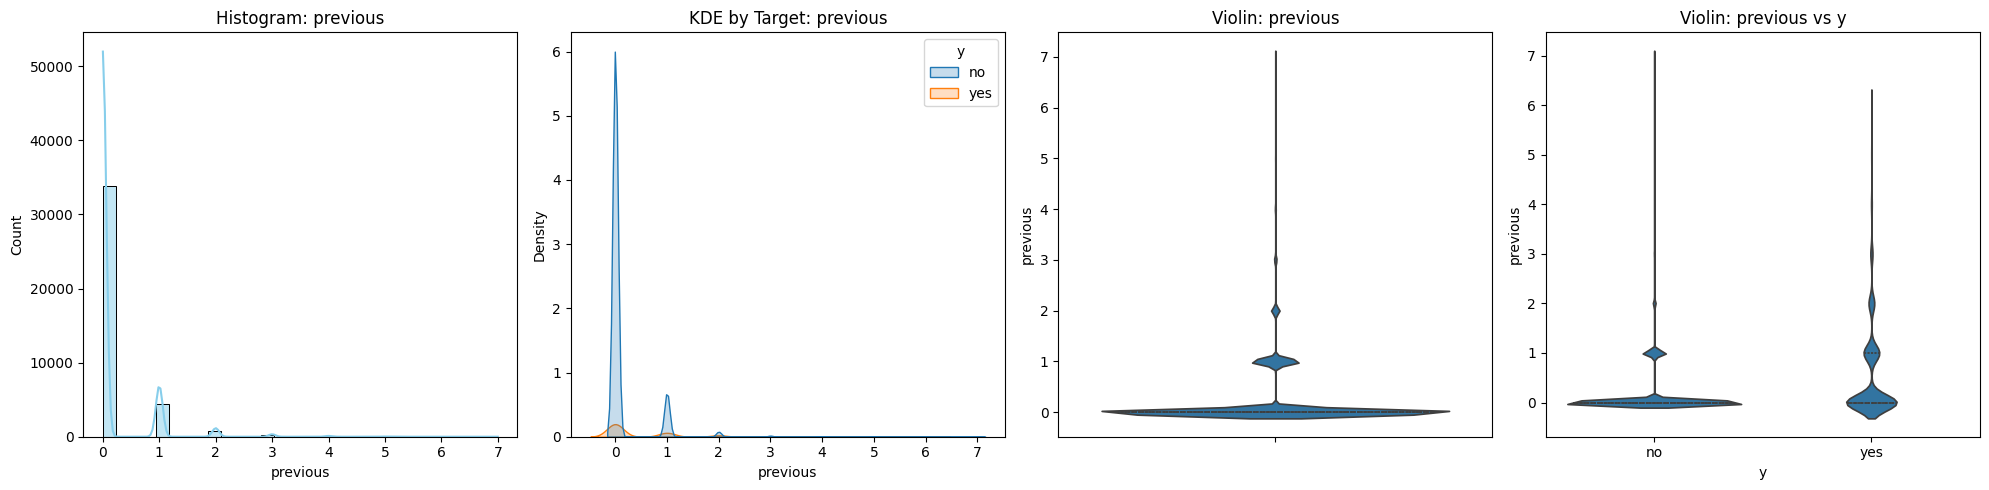

In [58]:
fig, axes = plt.subplots(1, 4, figsize=(20,5))  

sns.histplot(df['previous'], kde=True, bins=30, color='skyblue', ax=axes[0])
axes[0].set_title(f'Histogram: previous')

sns.kdeplot(data=df, x='previous', hue='y', fill=True, ax=axes[1])
axes[1].set_title(f'KDE by Target: previous')

sns.violinplot(y='previous',data=df,inner="quart", ax=axes[2])
axes[2].set_title(f'Violin: previous')

sns.violinplot(x='y', y='previous', data=df, inner="quart", ax=axes[3])
axes[3].set_title(f"Violin: previous vs y")

plt.tight_layout()
plt.show()

Most Customers Were Never Contacted Before

clients with previous > 0 have a higher chance of saying “yes”.but they are less

Multiple past interactions correlate positively with conversions.

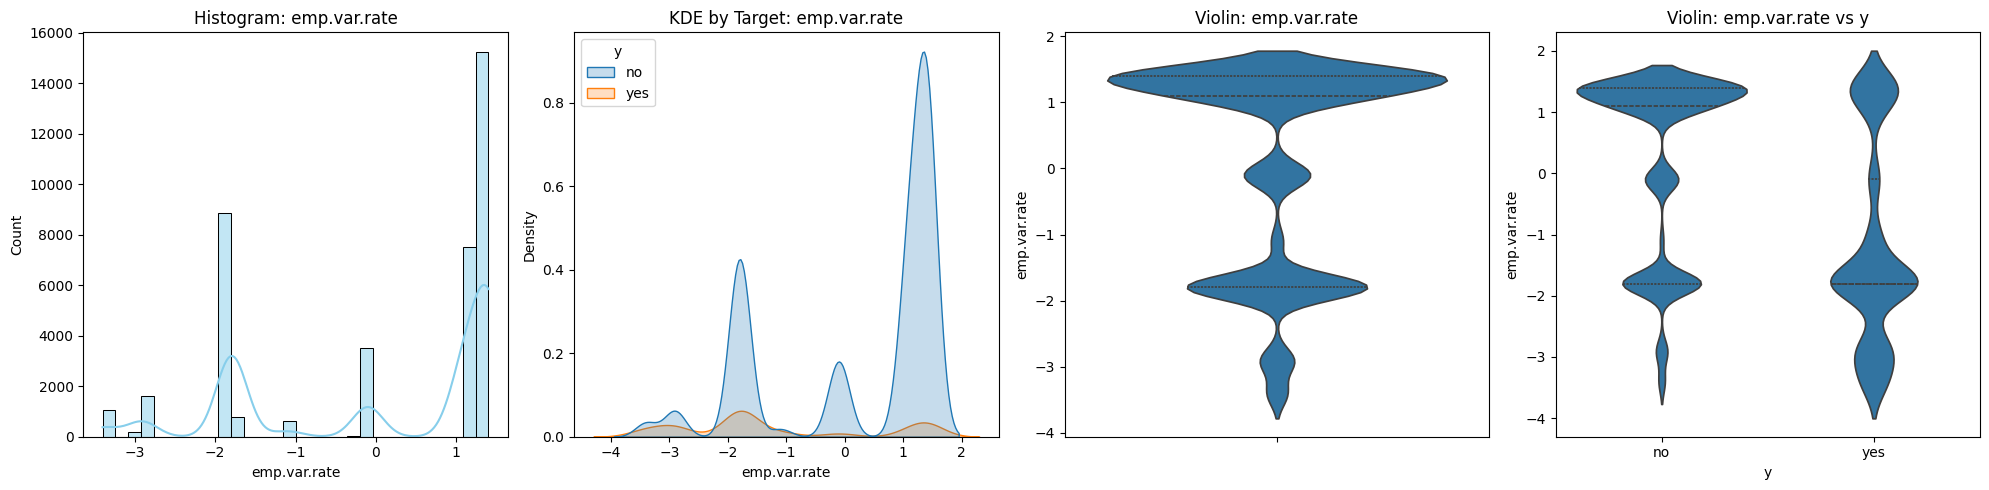

In [59]:
fig, axes = plt.subplots(1, 4, figsize=(20,5))  

sns.histplot(df['emp.var.rate'], kde=True, bins=30, color='skyblue', ax=axes[0])
axes[0].set_title(f'Histogram: emp.var.rate')

sns.kdeplot(data=df, x='emp.var.rate', hue='y', fill=True, ax=axes[1])
axes[1].set_title(f'KDE by Target: emp.var.rate')

sns.violinplot(y='emp.var.rate',data=df,inner="quart", ax=axes[2])
axes[2].set_title(f'Violin: emp.var.rate')

sns.violinplot(x='y', y='emp.var.rate', data=df, inner="quart", ax=axes[3])
axes[3].set_title(f"Violin: emp.var.rate vs y")

plt.tight_layout()
plt.show()

Most Customers Are in Periods of Positive Employment Rate (~1.1 to 1.4)

Conversions (Yes) Are Higher When emp.var.rate Is low or Negative (less than 0)


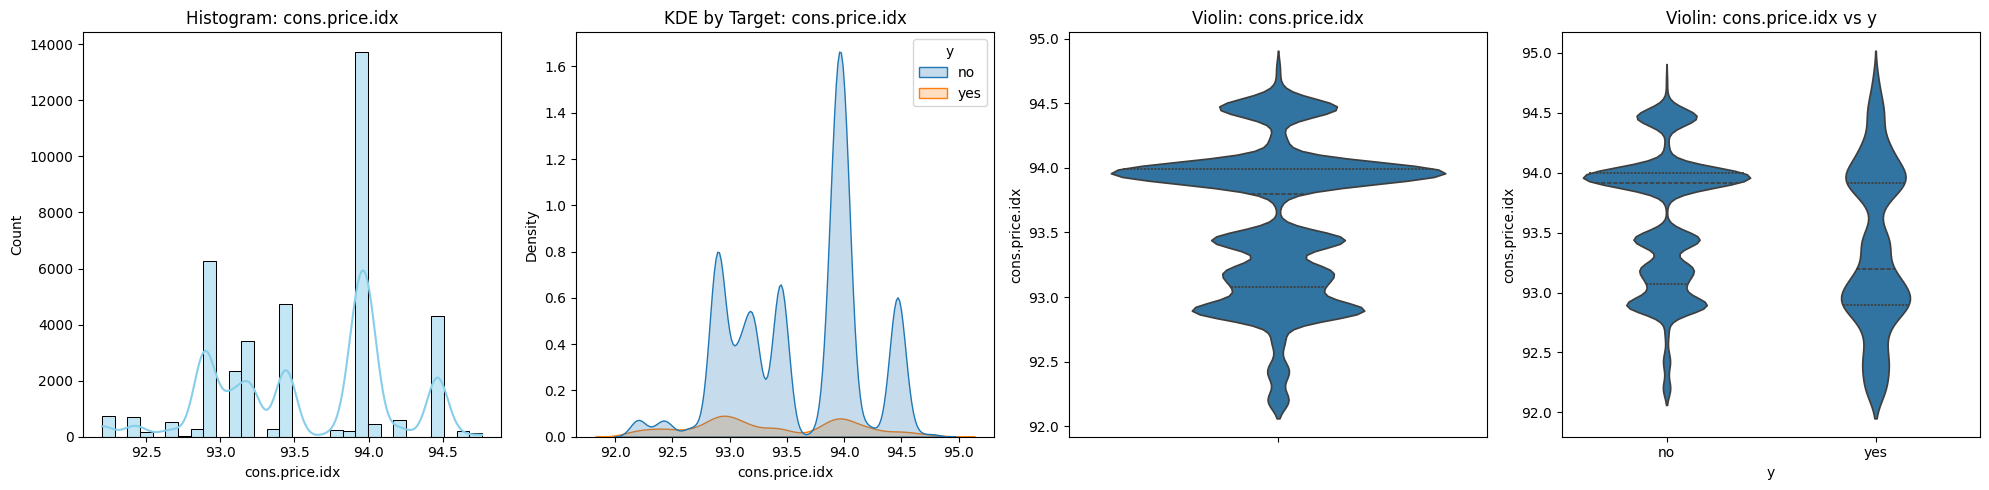

In [60]:
fig, axes = plt.subplots(1, 4, figsize=(20,5))  

sns.histplot(df['cons.price.idx'], kde=True, bins=30, color='skyblue', ax=axes[0])
axes[0].set_title(f'Histogram: cons.price.idx')

sns.kdeplot(data=df, x='cons.price.idx', hue='y', fill=True, ax=axes[1])
axes[1].set_title(f'KDE by Target: cons.price.idx')

sns.violinplot(y='cons.price.idx',data=df,inner="quart", ax=axes[2])
axes[2].set_title(f'Violin: cons.price.idx')

sns.violinplot(x='y', y='cons.price.idx', data=df, inner="quart", ax=axes[3])
axes[3].set_title(f"Violin: cons.price.idx vs y")

plt.tight_layout()
plt.show()

cons.price.idx Is Concentrated Between 92.5 and 94.5

higher conversion during periods of lower cons.price.ind.(Smaller cons.price.ind→ More Conversions)

The “No” Group Dominates Around 94.0+ cons.price.ind

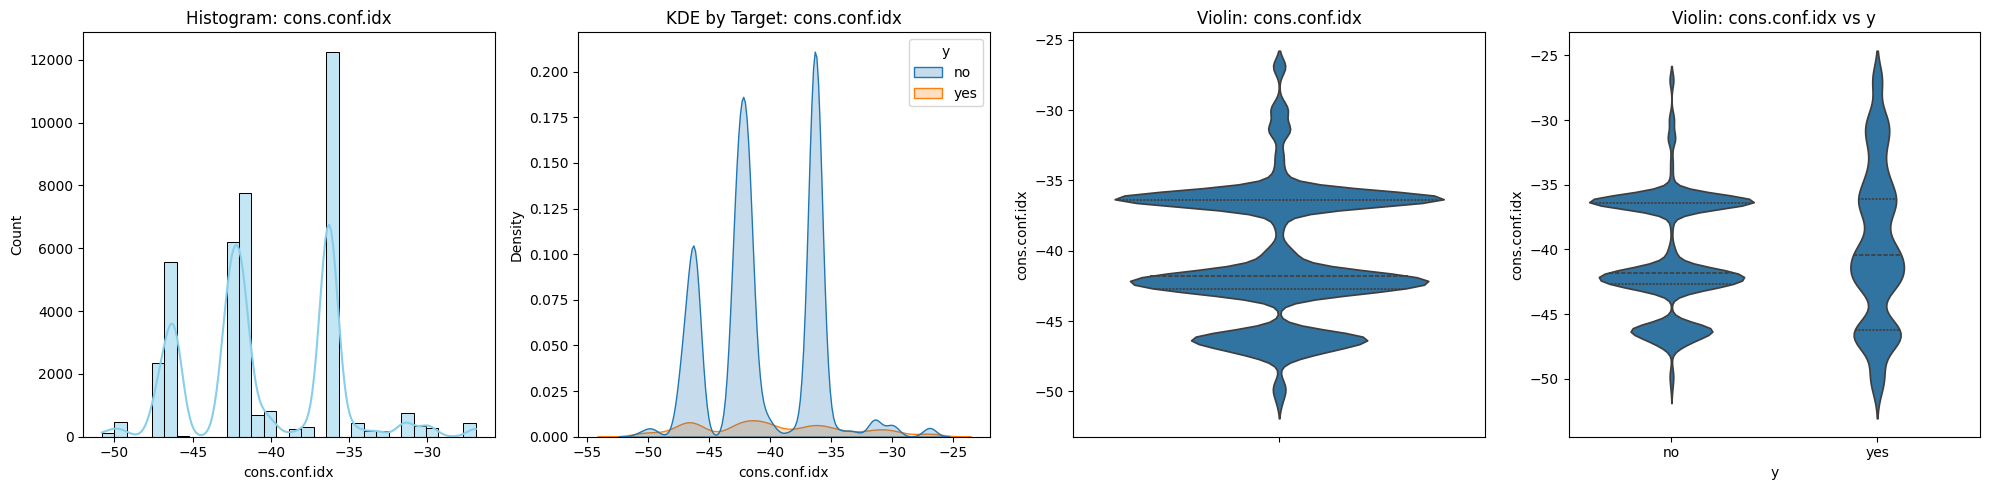

In [61]:
fig, axes = plt.subplots(1, 4, figsize=(20,5))  

sns.histplot(df['cons.conf.idx'], kde=True, bins=30, color='skyblue', ax=axes[0])
axes[0].set_title(f'Histogram: cons.conf.idx')

sns.kdeplot(data=df, x='cons.conf.idx', hue='y', fill=True, ax=axes[1])
axes[1].set_title(f'KDE by Target: cons.conf.idx')

sns.violinplot(y='cons.conf.idx',data=df,inner="quart", ax=axes[2])
axes[2].set_title(f'Violin: cons.conf.idx')

sns.violinplot(x='y', y='cons.conf.idx', data=df, inner="quart", ax=axes[3])
axes[3].set_title(f"Violin: cons.conf.idx vs y")

plt.tight_layout()
plt.show()

Consumer Confidence Index Is Mostly Between -50 and -30

Higher Subscription Rates When Confidence Is Very Low (-46 to -50)

Lower Confidence → Higher Conversions


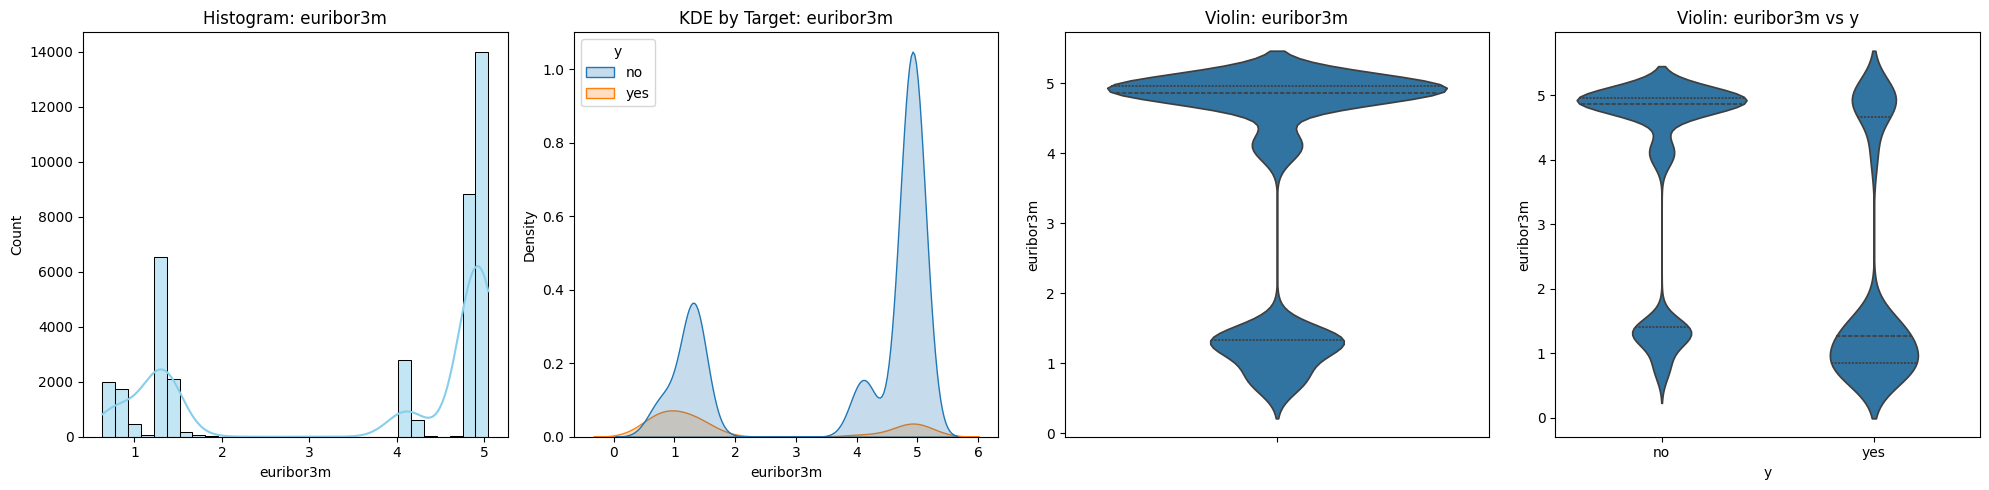

In [62]:
fig, axes = plt.subplots(1, 4, figsize=(20,5)) 

sns.histplot(df['euribor3m'], kde=True, bins=30, color='skyblue', ax=axes[0])
axes[0].set_title(f'Histogram: euribor3m')

sns.kdeplot(data=df, x='euribor3m', hue='y', fill=True, ax=axes[1])
axes[1].set_title(f'KDE by Target: euribor3m')

sns.violinplot(y='euribor3m',data=df,inner="quart", ax=axes[2])
axes[2].set_title(f'Violin: euribor3m')

sns.violinplot(x='y', y='euribor3m', data=df, inner="quart", ax=axes[3])
axes[3].set_title(f"Violin: euribor3m vs y")

plt.tight_layout()
plt.show()

Higher Subscriptions at Low Euribor (≈ 1.0–1.5)

High Euribor (~5.0) Dominated by “No”

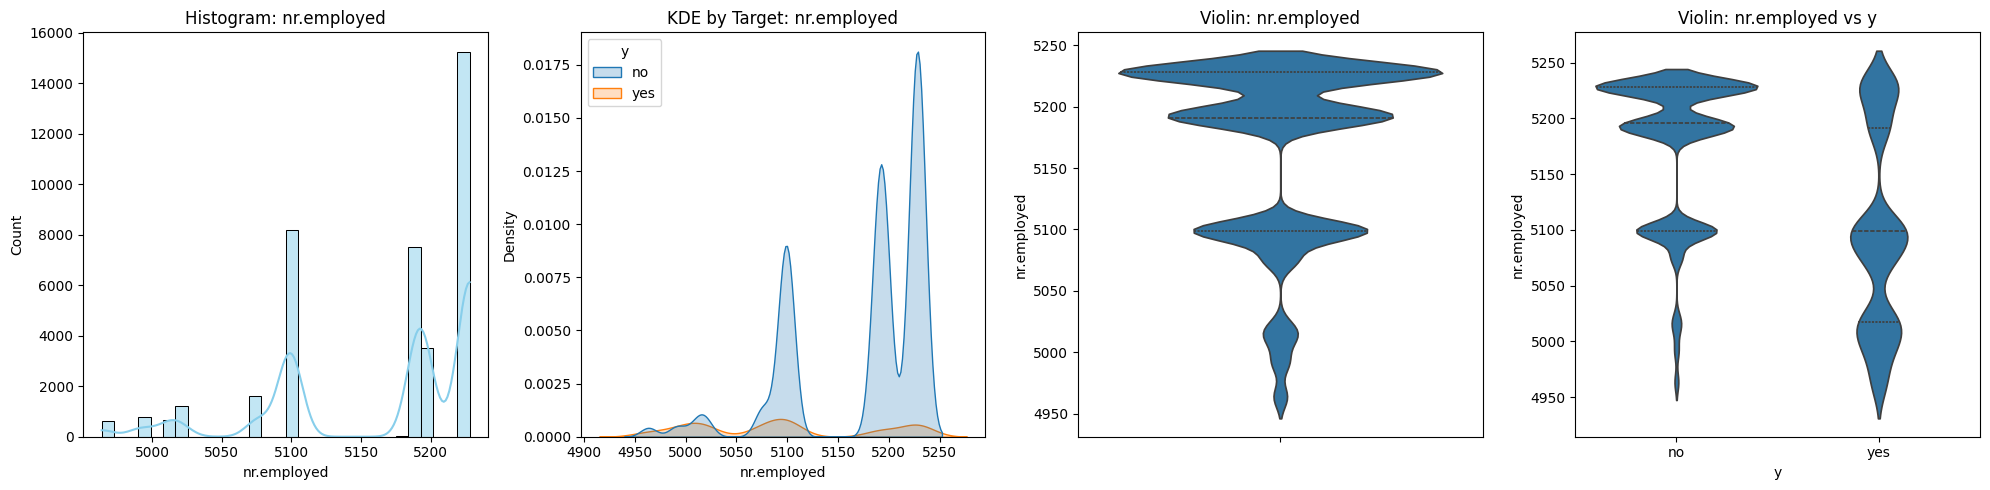

In [63]:
fig, axes = plt.subplots(1, 4, figsize=(20,5))  

sns.histplot(df['nr.employed'], kde=True, bins=30, color='skyblue', ax=axes[0])
axes[0].set_title(f'Histogram: nr.employed')

sns.kdeplot(data=df, x='nr.employed', hue='y', fill=True, ax=axes[1])
axes[1].set_title(f'KDE by Target: nr.employed')

sns.violinplot(y='nr.employed',data=df,inner="quart", ax=axes[2])
axes[2].set_title(f'Violin: nr.employed')

sns.violinplot(x='y', y='nr.employed', data=df, inner="quart", ax=axes[3])
axes[3].set_title(f"Violin: nr.employed vs y")

plt.tight_layout()
plt.show()

Higher Subscriptions at Lower Employment Levels(5000–5100)

Most customers during high employment levels declined the offer.

Lower employment figures often signal economic slowdown, guaranteed returns (like term deposits) more attractive.



In [64]:
## correlation analysis

y_num = df['y'].astype('category').cat.codes
correlations = df[numeric_features].corrwith(y_num)
print(correlations.sort_values(ascending=False))

previous          0.229706
cons.conf.idx     0.057146
age               0.028196
campaign         -0.072371
cons.price.idx   -0.137115
emp.var.rate     -0.298055
euribor3m        -0.307860
pdays            -0.325062
nr.employed      -0.354145
dtype: float64


#### 1. previous: +0.2297 (moderate positive)

Clients who had more contacts in previous campaigns are more likely to subscribe this time.This makes sense.

Actionable insight: Prioritize people with higher “previous” counts for follow-up calls or targeted offers.

#### 2. cons.conf.idx: +0.0571 (very weak positive)

The consumer confidence index (higher = more optimistic) rarely effect subscription probability upward.

Effect is so small it may not be practically useful on its own.

Actionable insight: could drop it or bucket it into bins if need to reduce dimensionality.

#### 3. age: +0.0282 (negligible positive)

Client age has almost no linear relationship with subscribing in this campaign.

Actionable insight: find a non-linear effect in age using different age groups.

#### 4. campaign: –0.0724 (weak negative)

More contacts in this current campaign slightly reduce the chance of subscription.

Likely reflects “over-calling” — too many calls irritate prospects.

Actionable insight: Cap the number of calls per client; after 3–4 calls consider pausing outreach.

#### 5. cons.price.idx: –0.1371 (weak–moderate negative)

Higher consumer price index slightly lowers subscription rates.

In tougher economic times (higher prices), people subscribe less.maybe savings are less.

Actionable insight: In periods of rising prices, consider promotions or lower-commitment offers.

#### 6. mp.var.rate: –0.2981 (moderate negative)

When employment variation rate is higher (better labor markets), subscription rates drop.may be they earn better return during good markets from else where.

Actionable insight: reach people when employment variation rate is lower.

#### 7. euribor3m: –0.3079 (moderate negative)

Higher short-term interest rates correspond with lower subscriptions.

When borrowing costs rise, people tighten discretionary spending.

Actionable insight: Monitor interest-rate movements and adjust marketing spend or incentives in response.

#### 8. pdays: –0.3251 (moderate negative)

The longer since last contact in previous campaigns, the less likely they are to subscribe now.

Actionable insight: Re-engage lapsed contacts more aggressively within a shorter window (follow up within 60 days).

#### 9. nr.employed: –0.3541 (moderately strong negative)

A higher total number of employed people strongly corresponds with lower subscription rates.

Reflects broader economic conditions: in strong job markets, clients may deprioritize additional services.

Actionable insight: Use employment data as a trigger: ramp up promotional offers when employment numbers peak to counteract drop in subscriptions.


#### 4.2 For Categorical Features

In [65]:
# define categorical columns
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 11 categorical features : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [66]:
### removing 'y' from categorical features
categorical_features.remove('y')



 Feature: job
y                no   yes  Total  yes_ratio
job                                        
admin.         8538  1335   9873   0.135217
blue-collar    8202   633   8835   0.071647
entrepreneur   1284   121   1405   0.086121
housemaid       922   106   1028   0.103113
management     2494   326   2820   0.115603
retired        1252   431   1683   0.256090
self-employed  1237   149   1386   0.107504
services       3479   322   3801   0.084715
student         581   271    852   0.318075
technician     5677   727   6404   0.113523
unemployed      851   141    992   0.142137
unknown         289    36    325   0.110769


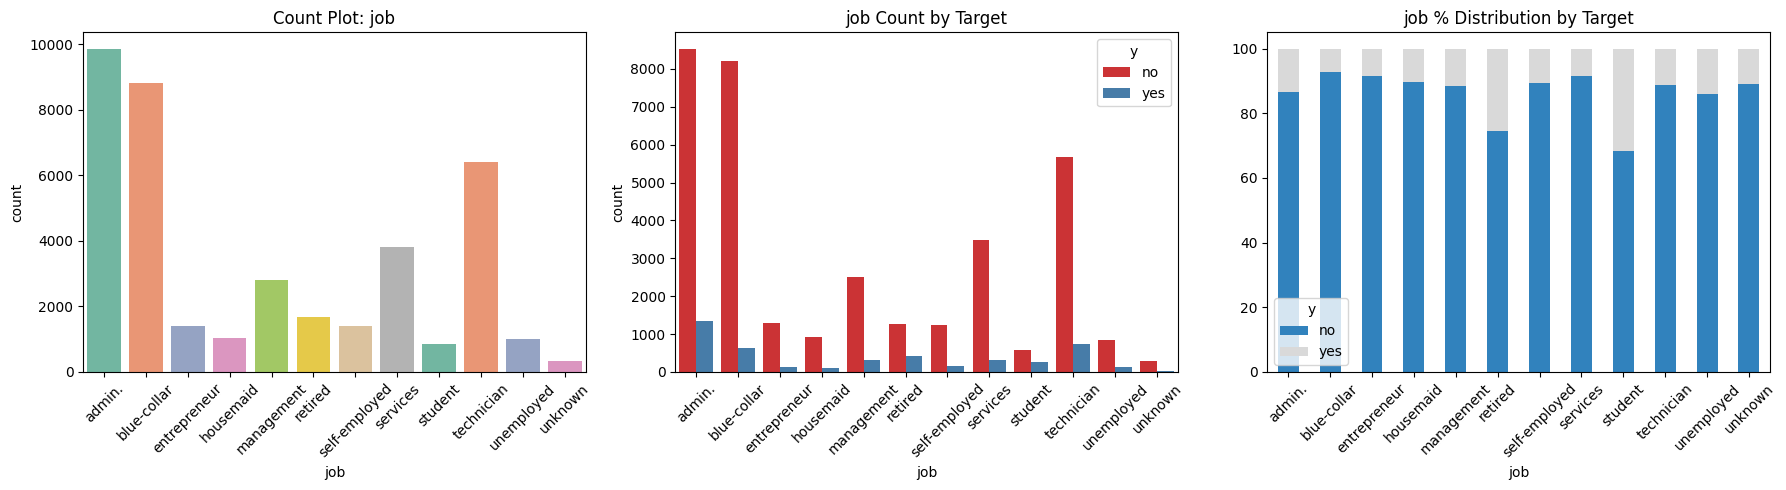


 Feature: marital
y            no   yes  Total  yes_ratio
marital                                
divorced   3987   472   4459   0.105853
married   21353  2516  23869   0.105409
single     9399  1598  10997   0.145312
unknown      67    12     79   0.151899


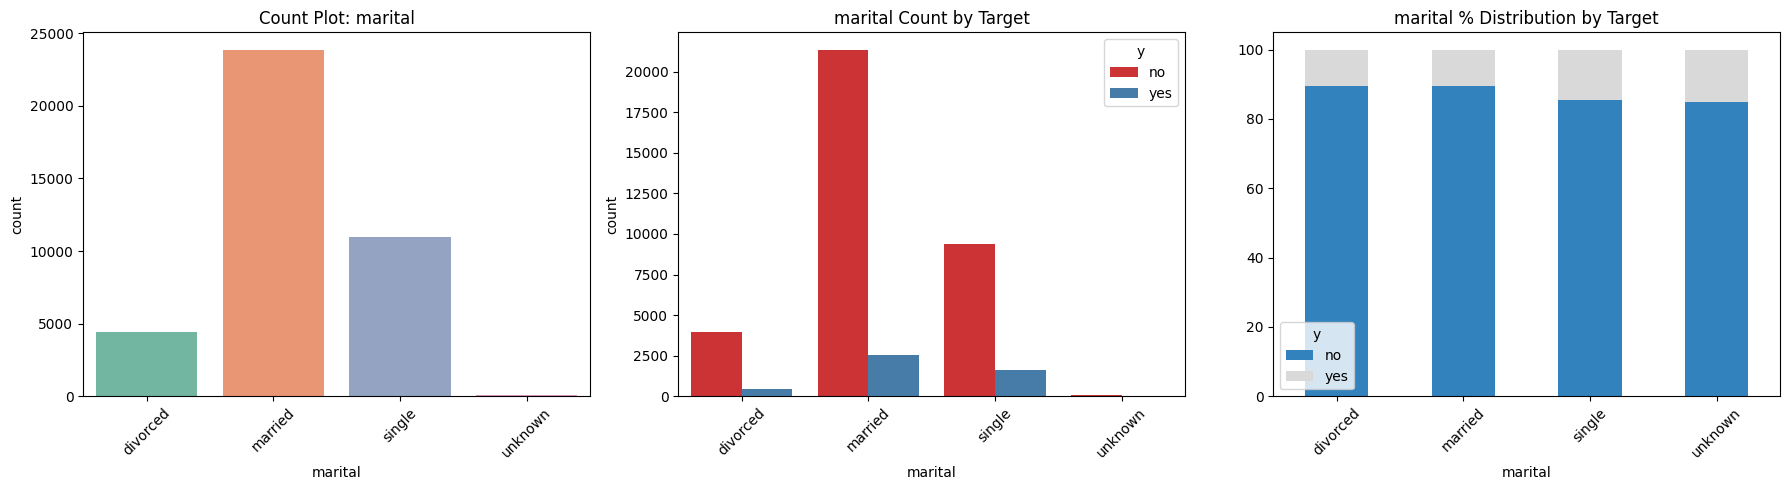


 Feature: education
y                      no   yes  Total  yes_ratio
education                                        
basic.4y             3568   425   3993   0.106436
basic.6y             2034   188   2222   0.084608
basic.9y             5319   466   5785   0.080553
high.school          8098  1023   9121   0.112159
illiterate             14     4     18   0.222222
professional.course  4426   592   5018   0.117975
university.degree    9910  1651  11561   0.142808
unknown              1437   249   1686   0.147687


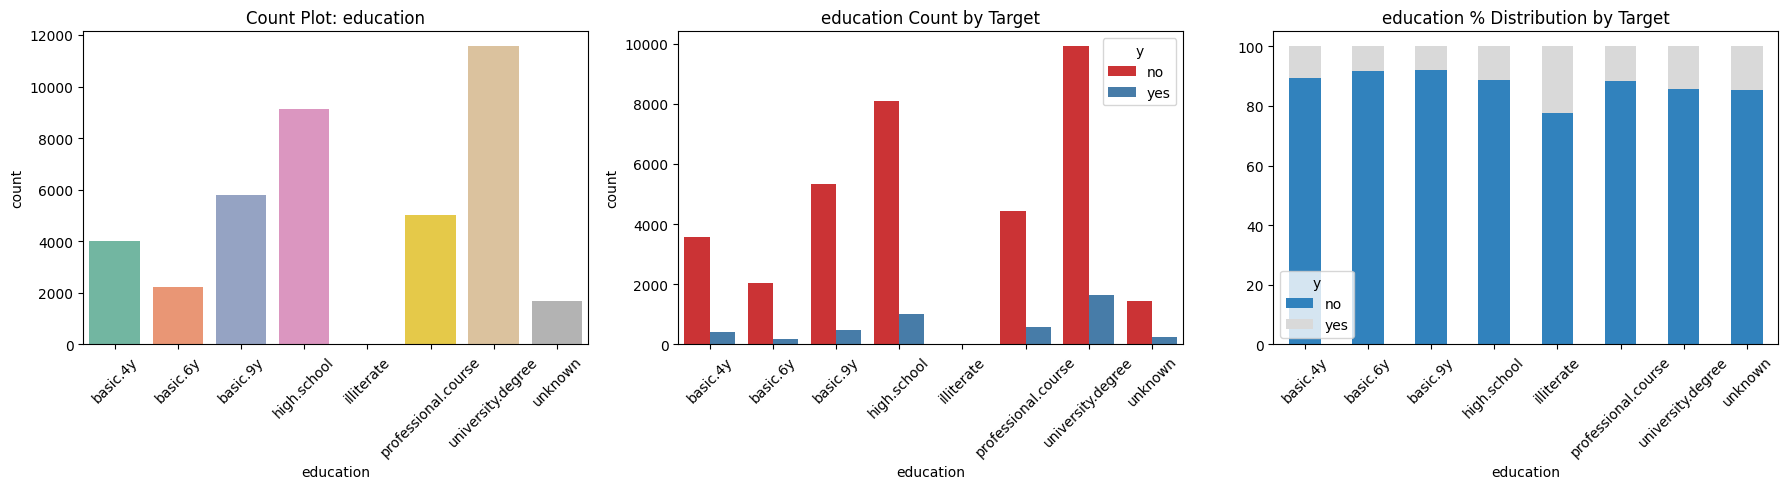


 Feature: default
y           no   yes  Total  yes_ratio
default                               
no       26979  4156  31135   0.133483
unknown   7824   442   8266   0.053472
yes          3     0      3   0.000000


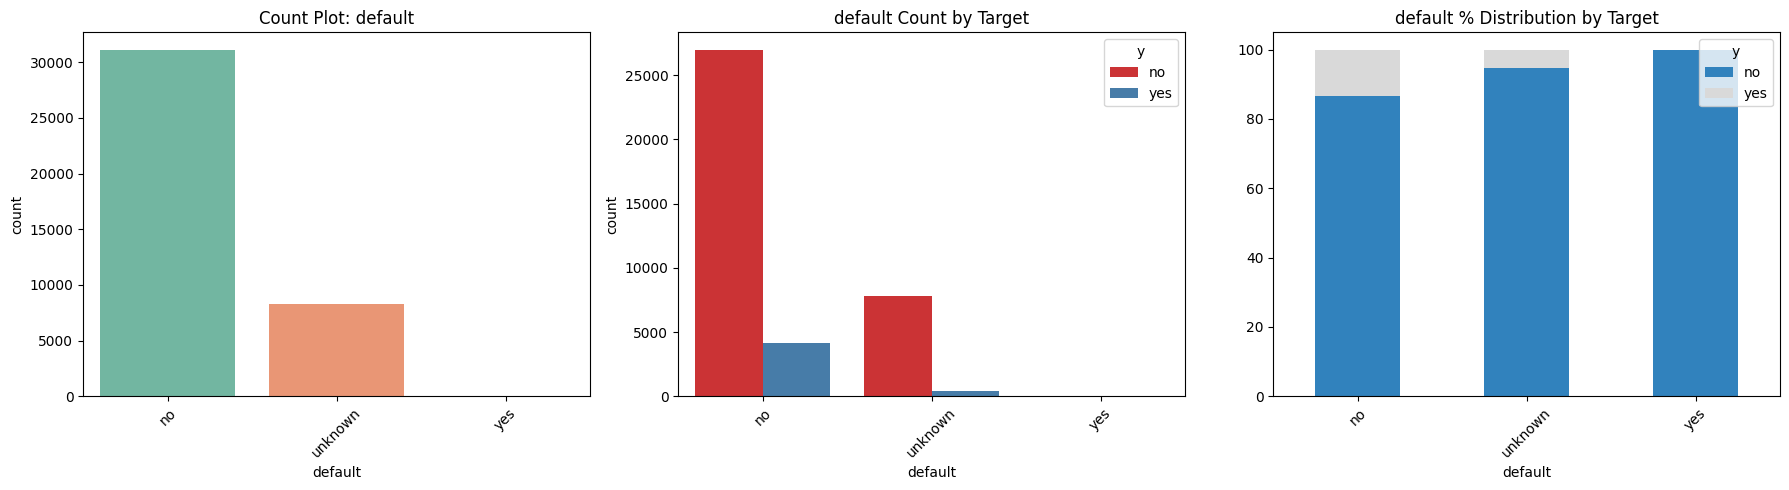


 Feature: housing
y           no   yes  Total  yes_ratio
housing                               
no       15851  2012  17863   0.112635
unknown    873   107    980   0.109184
yes      18082  2479  20561   0.120568


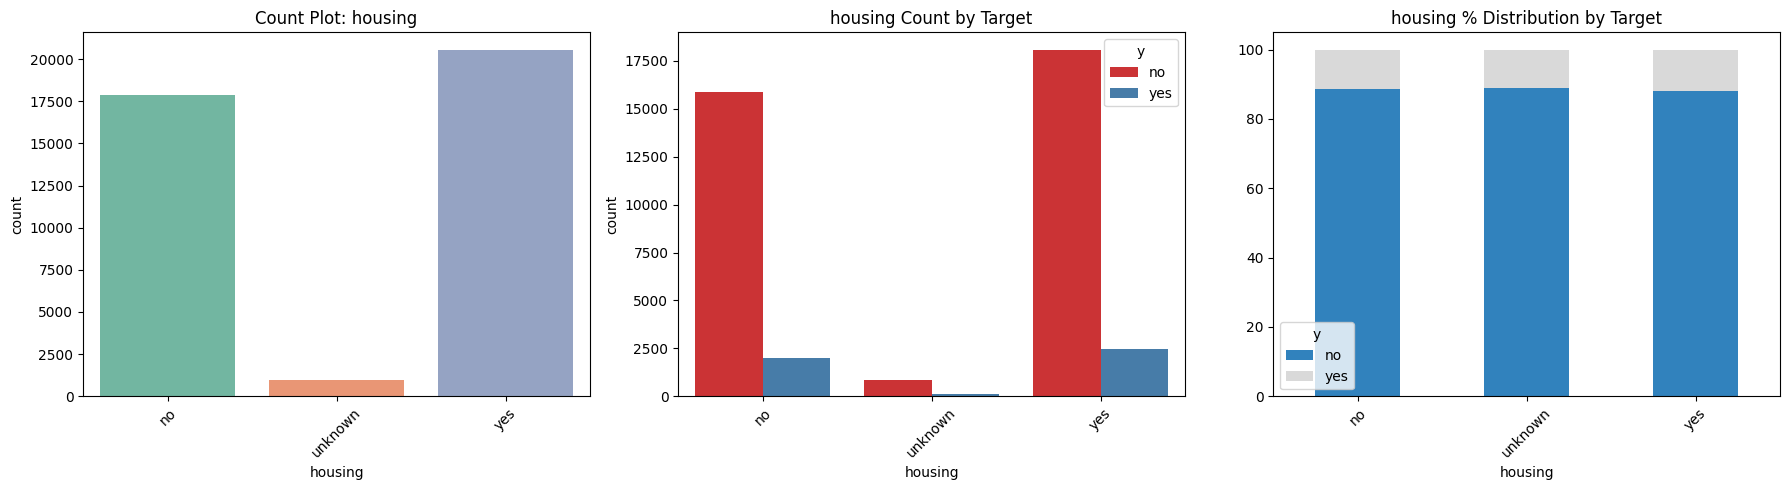


 Feature: loan
y           no   yes  Total  yes_ratio
loan                                  
no       28439  3809  32248   0.118116
unknown    873   107    980   0.109184
yes       5494   682   6176   0.110427


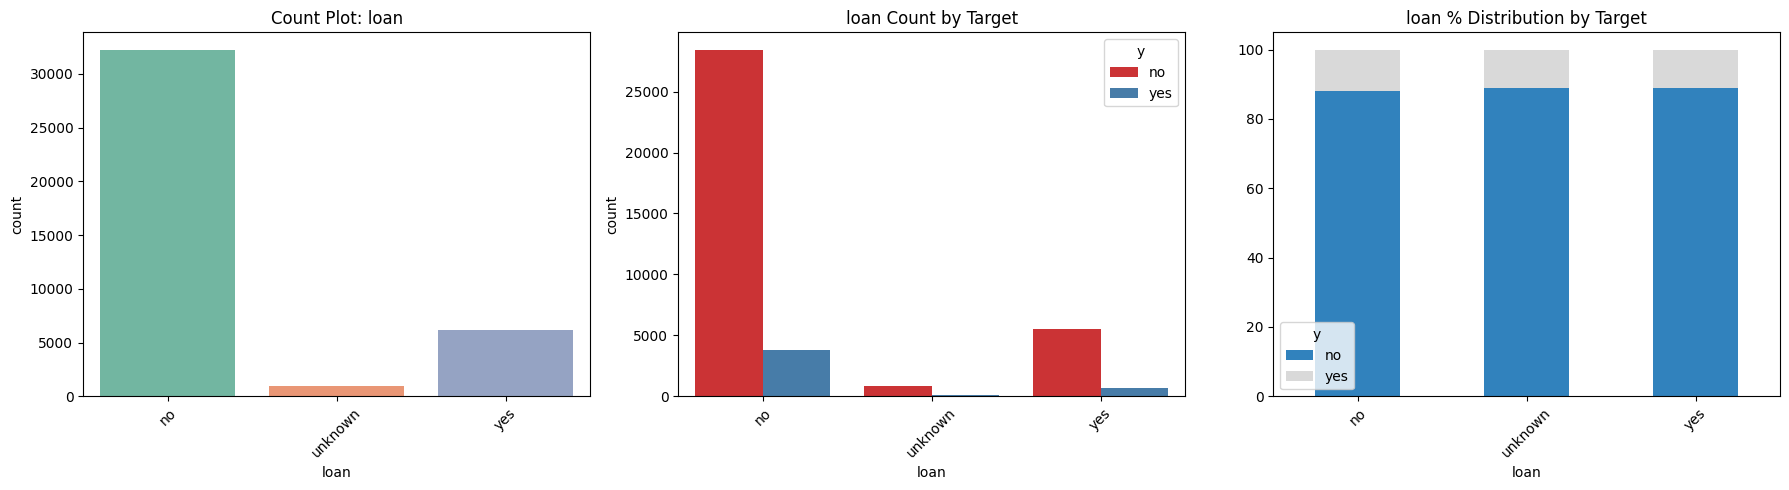


 Feature: contact
y             no   yes  Total  yes_ratio
contact                                 
cellular   20862  3811  24673   0.154460
telephone  13944   787  14731   0.053425


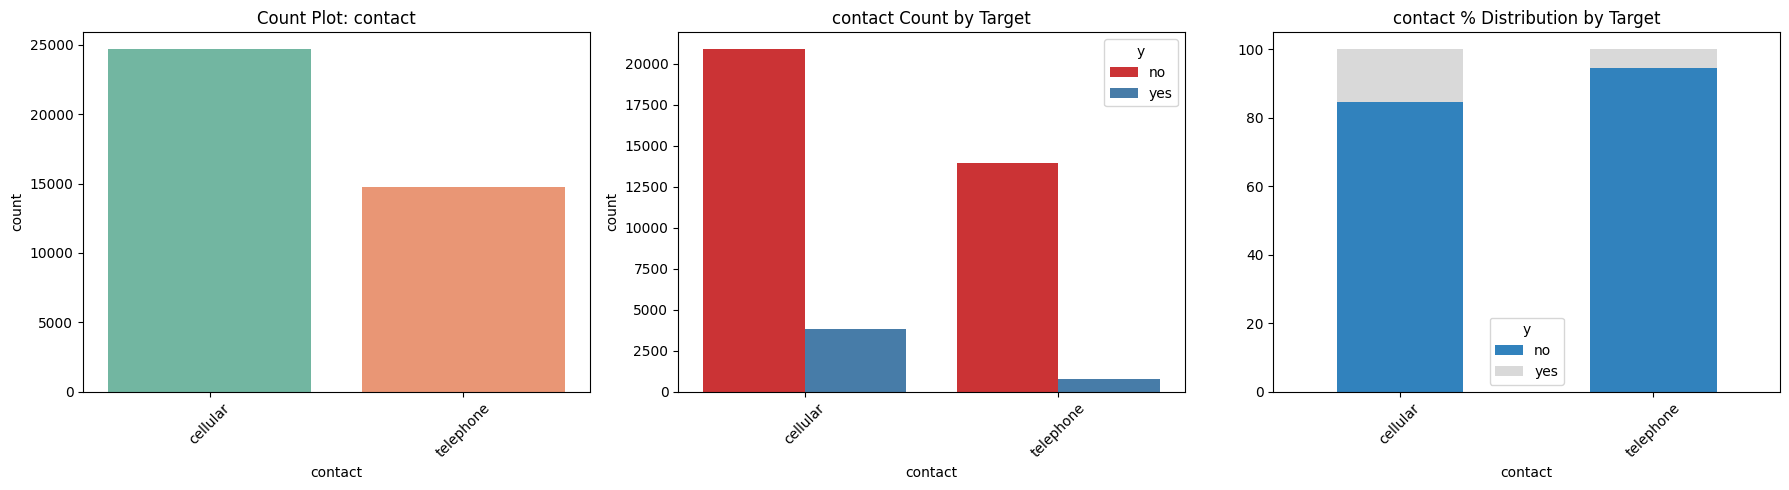


 Feature: month
y         no  yes  Total  yes_ratio
month                              
apr     2003  532   2535   0.209862
aug     5068  651   5719   0.113831
dec       93   88    181   0.486188
jul     6053  645   6698   0.096297
jun     4691  554   5245   0.105624
mar      262  268    530   0.505660
may    12433  882  13315   0.066241
nov     3499  411   3910   0.105115
oct      395  312    707   0.441301
sep      309  255    564   0.452128


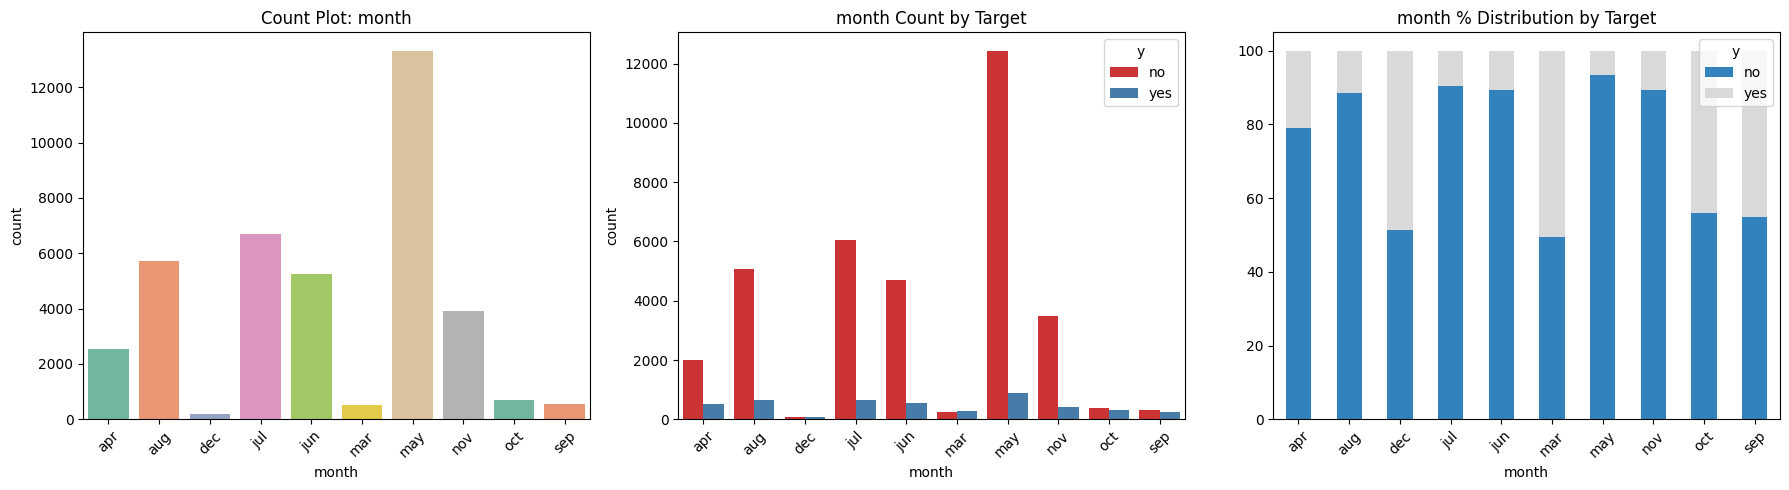


 Feature: day_of_week
y              no   yes  Total  yes_ratio
day_of_week                              
fri          6711   840   7551   0.111244
mon          7346   842   8188   0.102833
thu          7160  1037   8197   0.126510
tue          6763   945   7708   0.122600
wed          6826   934   7760   0.120361


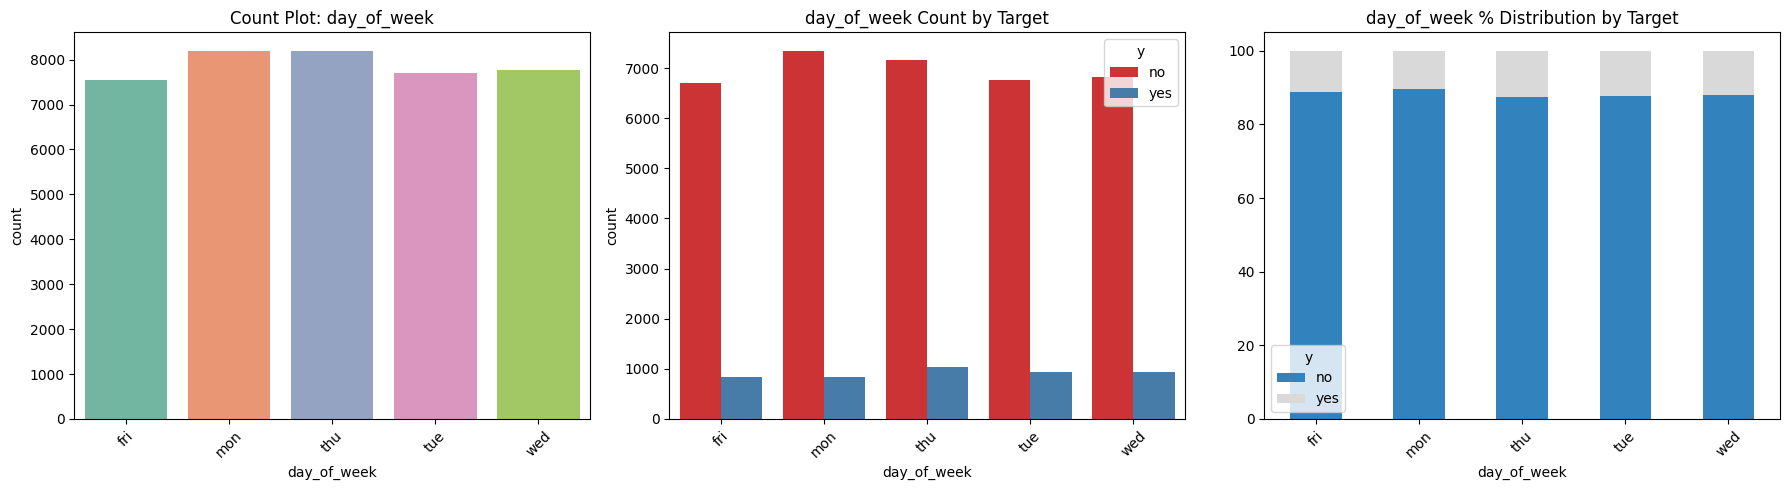


 Feature: poutcome
y               no   yes  Total  yes_ratio
poutcome                                  
failure       3571   603   4174   0.144466
nonexistent  30757  3101  33858   0.091588
success        478   894   1372   0.651603


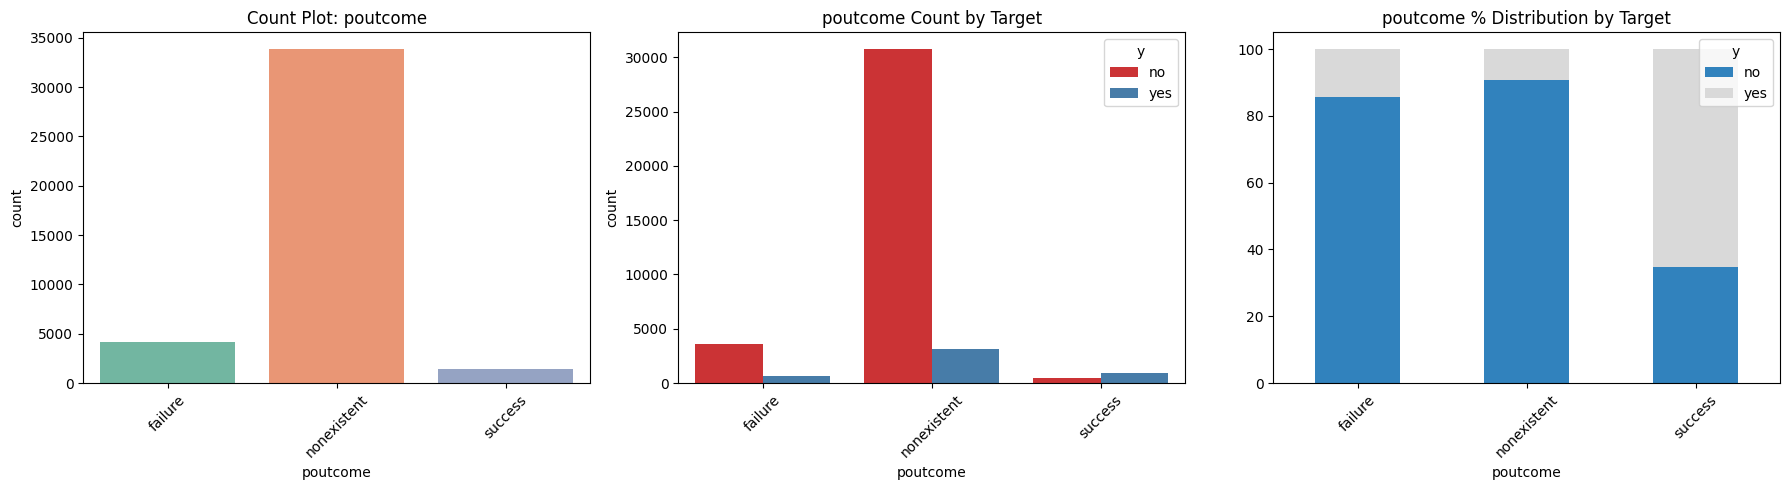

In [67]:
for col in categorical_features:
    print(f"\n Feature: {col}")
    
    # Group by campaign and target 'y'
    result = df.groupby([col, 'y']).size().unstack(fill_value=0)

    # Add a total column
    result['Total'] = result.sum(axis=1)

    # Calculate ratios of 'yes'
    result['yes_ratio'] = result['yes'] / result['Total']   

    print(result)
    
    # Create plots
    fig, axes = plt.subplots(1, 3, figsize=(18,5))
    
    # 1. Count Plot
    sns.countplot(x=col, data=df, order=result.index, ax=axes[0], palette="Set2")
    axes[0].set_title(f'Count Plot: {col}')
    axes[0].tick_params(axis='x', rotation=45)
    
    # 2. Count Plot by Target
    sns.countplot(x=col, hue='y', data=df, order=result.index, ax=axes[1], palette="Set1")
    axes[1].set_title(f'{col} Count by Target')
    axes[1].tick_params(axis='x', rotation=45)
    
    # 3. Percentage Stacked Bar
    if df['y'].nunique() <= 10:
        crosstab = pd.crosstab(df[col], df['y'], normalize='index') * 100
        crosstab.plot(kind='bar', stacked=True, ax=axes[2], colormap="tab20c")
        axes[2].set_title(f'{col} % Distribution by Target')
        axes[2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()


1. job vs y

      Students and retired people are most likely to say yes — probably because they have time or interest.

      Blue-collar workers (7.1%) and entrepreneurs (8.6%) are the least likely to convert.

      Unknown job types have a moderate rate (~11%).

2. marital vs y

      Single individuals are slightly more responsive.

      Married and divorced have similar and lower conversion rates (~10.5%).


3. education vs y

      Higher education → better conversion.

      Basic education (4y, 6y, 9y) groups have lower conversion (<11%).


4. default vs y

      Having no credit default leads to a much higher chance of saying yes.

      The yes group is too small to learn from.

5. housing vs y

      Slightly higher success for those with housing loans, but overall very close.


6. loan vs y

      Very minimal effect on conversion.


7. contact vs y

      People contacted via cellular were 3× more likely to say yes.

      telephone contact is significantly less effective.

8. month vs y

      months mar, dec, oct, sep have very high success rates.

      Campaigns in May had very poor response.


9. day_of_week vs y

      Slight improvement on mid-week days, particularly Thursday.


10. poutcome (previous campaign outcome) vs y

      Previous campaign success is by far the best predictor of future success.

      If a contact previously responded positively, they’re 65% likely to convert again.


### Cramér’s V calculation for two categorical values

In [68]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    # Create contingency table
    confusion_matrix = pd.crosstab(x, y)
    # Chi-Square test
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    # Total observations
    n = confusion_matrix.sum().sum()
    # Number of rows and columns
    r, k = confusion_matrix.shape
    # Cramér’s V formula
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))


# Calculate Cramér’s V
for col in categorical_features:
    v = cramers_v(df[col], df['y'])
    print(f"Cramér’s V for {col} and y: {round(v, 3)}")
    

Cramér’s V for job and y: 0.153
Cramér’s V for marital and y: 0.056
Cramér’s V for education and y: 0.07
Cramér’s V for default and y: 0.102
Cramér’s V for housing and y: 0.013
Cramér’s V for loan and y: 0.009
Cramér’s V for contact and y: 0.152
Cramér’s V for month and y: 0.273
Cramér’s V for day_of_week and y: 0.027
Cramér’s V for poutcome and y: 0.32


#### 1. Feature‐by‐feature interpretation
1. job (0.153)

--> Weak association with y.

--> Certain occupations (e.g., “management” vs. “blue-collar”) do differ in subscribe-vs-no-subscribe rates, but job alone is not a strong discriminator.

2. marital (0.056)

--> Negligible association.

--> Whether someone is single, married, or divorced has almost no relationship with the outcome.

3. education (0.070)

--> Negligible to very weak association.

--> Levels like “secondary” vs. “tertiary” show only tiny differences in behavior.

4. default (0.102)

--> Borderline weak association.

--> Customers with credit in default slightly differ from those without—but it’s still a small effect.

5. housing (0.013)

--> Essentially no association.

--> Having a housing loan is unrelated to the campaign’s success.

6. loan (0.009)

--> No association.

--> Personal loan status doesn’t influence the target.

7. contact (0.152)

--> Weak association.

--> Type of contact (“cellular” vs. “telephone”) shows some difference—cellular contacts often yield better response.

8. month (0.273)

--> Moderate association.

--> Time of year matters: campaigns in certain months (e.g., May, July) perform noticeably better than others.

9. day_of_week (0.027)

--> Negligible association.

--> Which weekday you call on has virtually no effect.

10. poutcome (0.320)

--> Moderate association.

--> Outcome of the previous campaign (“success”, “failure”, “other”) is one of the strongest predictors: a previous success greatly increases current subscribe rates.


# Mulivariate Analysis

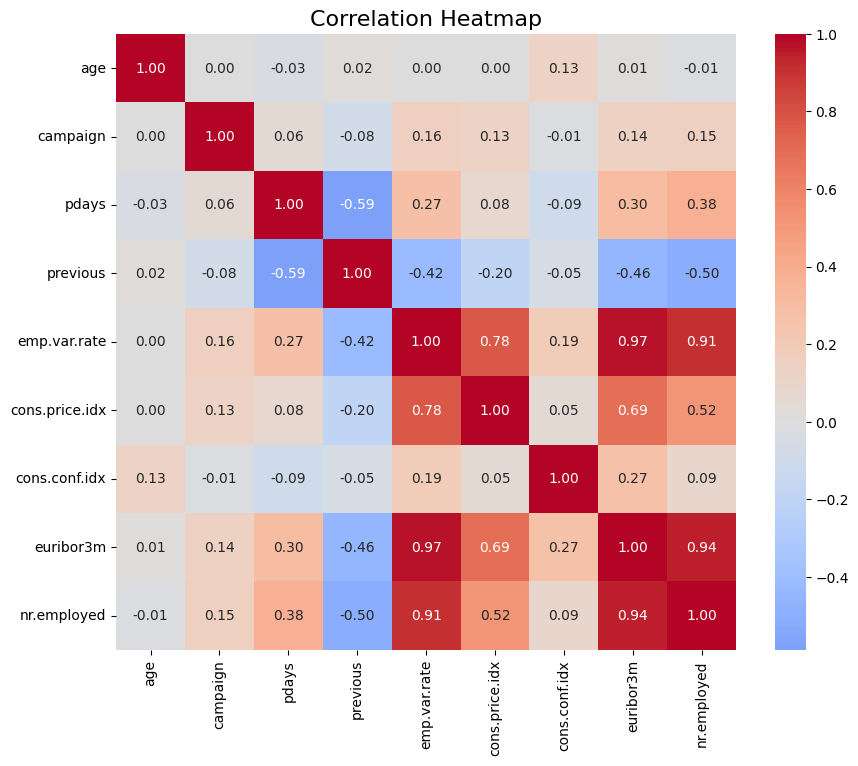

In [69]:
# Compute correlation matrix
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

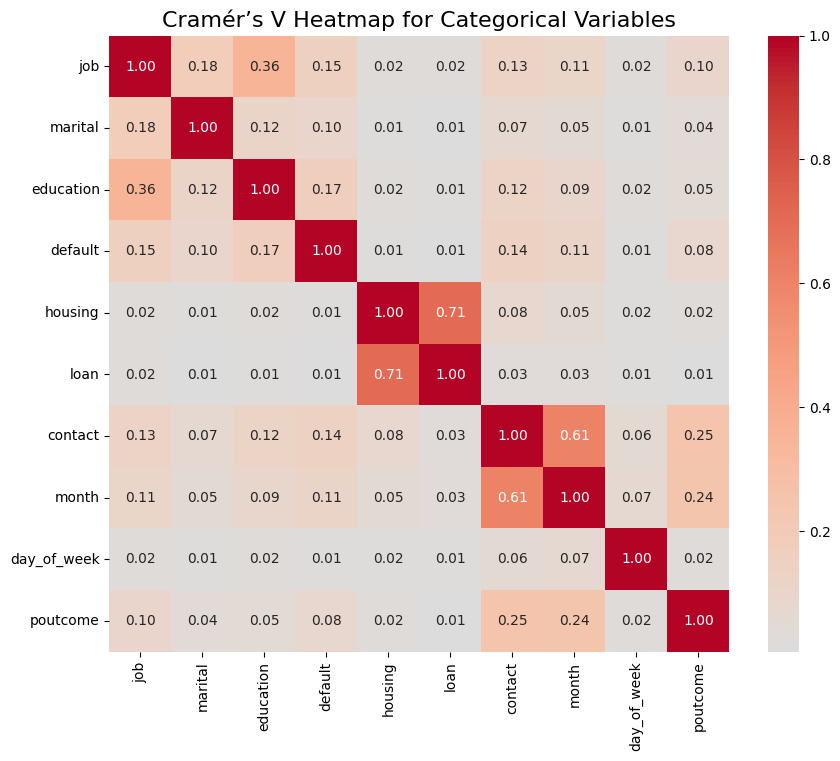

In [70]:
# Create empty DataFrame
cramer_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)

# Fill the matrix
for col1 in categorical_features:
    for col2 in categorical_features:
        if col1 == col2:
            cramer_matrix.loc[col1, col2] = 1.0
        else:
            cramer_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert to float
cramer_matrix = cramer_matrix.astype(float)

plt.figure(figsize=(10,8))
sns.heatmap(cramer_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Cramér’s V Heatmap for Categorical Variables", fontsize=16)
plt.show()

In [71]:
import os
import pandas as pd

# Define file path
file_path = "../data/eda_data.csv"

# Check if file already exists
if os.path.exists(file_path):
    print("File already exists.")
else:
    df.to_csv(file_path, index=False)
    print("CSV saved in data folder successfully!")



File already exists.
